In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Завантажимо датасет __data_2d.csv__:

In [16]:
df_2d = pd.read_csv('ds-hw-6/data/data_2d.csv', header=None)
df_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


Візуалізуємо наші дані:

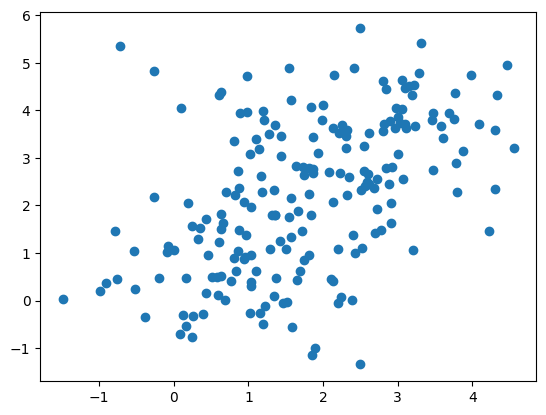

In [17]:
plt.scatter(df_2d[1], df_2d[2])
plt.show()

Застосуємо алгоритм K-means для кластеризації даних. Щоб знайти оптимальну кількість кластерів, скористаємось ліктьовим методом:

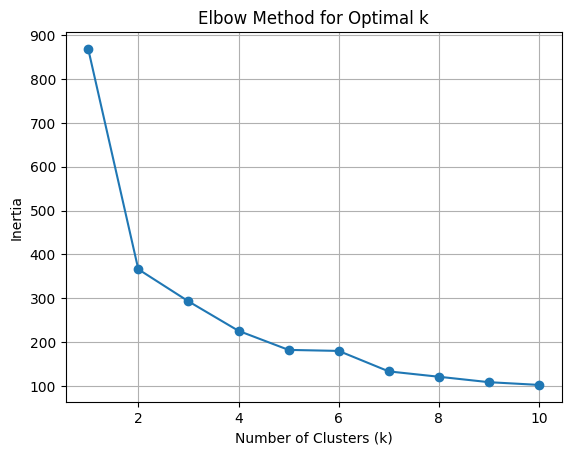

In [18]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_2d)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

Отже як можна побачити з графіку ліктьового методу оптимальна кількість кластерів дорівнює k=2. Проведемо кластеризацію та додамо до нашого датасету стовпець __Cluster__, що містить мітки кластерів:

In [19]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(df_2d)

df_2d['Cluster'] = kmeans.labels_
df_2d

,0,1,2,Cluster
0,0.0,-0.768716,0.460860,1
1,0.0,2.687848,2.366961,0
2,0.0,-0.201379,0.470430,1
3,0.0,0.608496,1.225400,1
4,0.0,-0.082282,1.137218,1
...,...,...,...,...
195,1.0,0.629144,4.378584,0
196,1.0,-0.723824,5.361801,0
197,1.0,1.346107,2.333476,0
198,1.0,3.608219,3.411546,0


Візуалізуємо наші дані після кластеризації:

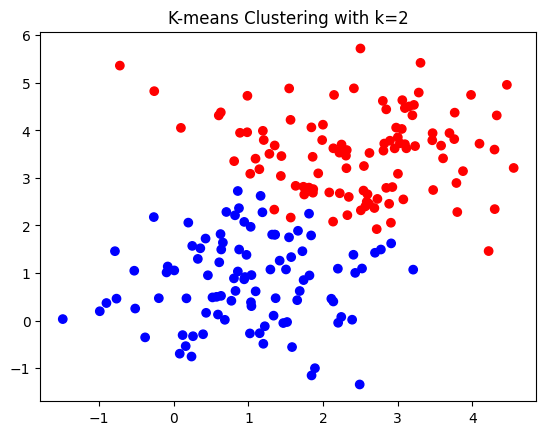

In [20]:
colors = ['red', 'blue']
plt.scatter(df_2d[1], df_2d[2], c=df_2d['Cluster'].map(lambda x: colors[x]))
plt.title('K-means Clustering with k=2')
plt.show()

Завантажимо дані з датасету __mnist.csv__:

In [21]:
df_mnist = pd.read_csv('ds-hw-6/data/mnist.csv', header=None)
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Як бачимо, цей датафрейм містить 784 ознаки для кожного зразка. Скористаємось алгоритмом PCA щоб зменшити розмірність наших даних, попередньо нормалізувавши їх:

In [22]:
scaler = StandardScaler()
df_mnist_normalized = scaler.fit_transform(df_mnist)

pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(df_mnist_normalized)

df_mnist_2d = pd.DataFrame({'PC1': mnist_2d[:, 0], 'PC2': mnist_2d[:, 1]})
df_mnist_2d

,PC1,PC2
0,-4.528481,4.196766
1,5.025692,-12.466808
2,-6.907413,-5.890606
3,8.584194,-0.337813
4,1.105899,6.577047
...,...,...
495,8.575707,-1.873341
496,-3.367088,7.348719
497,-6.207972,0.235826
498,0.380140,-0.372775


Візуалізуємо дані після зменшення розмірності:

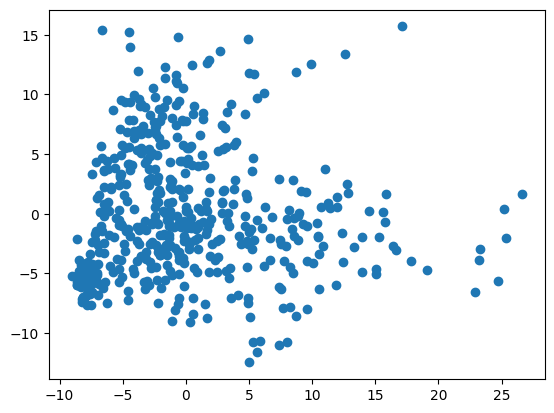

In [23]:
plt.scatter(df_mnist_2d['PC1'], df_mnist_2d['PC2'])
plt.show()

Застосуємо алгоритм K-means для кластеризації даних. Щоб знайти оптимальну кількість кластерів, скористаємось ліктьовим методом:

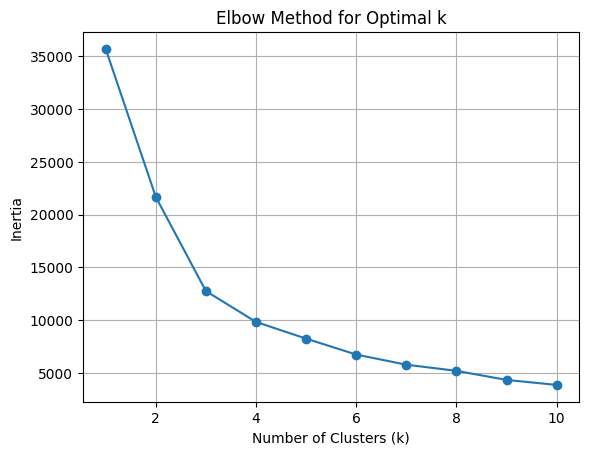

In [24]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_mnist_2d)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

Отже як можна побачити з графіку ліктьового методу оптимальна кількість кластерів дорівнює k=3. Проведемо кластеризацію та додамо до нашого датасету стовпець __Cluster__, що містить мітки кластерів:

In [25]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df_mnist_2d)

df_mnist_2d['Cluster'] = kmeans.labels_
df_mnist_2d

,PC1,PC2,Cluster
0,-4.528481,4.196766,1
1,5.025692,-12.466808,2
2,-6.907413,-5.890606,0
3,8.584194,-0.337813,2
4,1.105899,6.577047,1
...,...,...,...
495,8.575707,-1.873341,2
496,-3.367088,7.348719,1
497,-6.207972,0.235826,0
498,0.380140,-0.372775,0


Візуалізуємо наші дані після кластеризації:

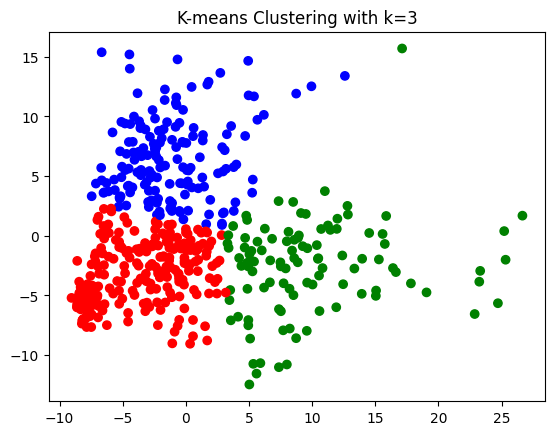

In [26]:
colors = ['red', 'blue', 'green']
plt.scatter(df_mnist_2d['PC1'], df_mnist_2d['PC2'], c=df_mnist_2d['Cluster'].map(lambda x: colors[x]))
plt.title('K-means Clustering with k=3')
plt.show()